In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('historical_data.csv', dtype={'post_code':'str'},parse_dates=['date']) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342152 entries, 0 to 1342151
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype                               
---  ------             --------------    -----                               
 0   date               1342152 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   station_uuid       1342152 non-null  object                              
 2   diesel             1342152 non-null  float64                             
 3   e5                 1342152 non-null  float64                             
 4   e10                1342152 non-null  float64                             
 5   dieselchange       1342152 non-null  int64                               
 6   e5change           1342152 non-null  int64                               
 7   e10change          1342152 non-null  int64                               
 8   name               1342152 non-null  object                              
 9   brand        

In [60]:
df.groupby('bundesland').mean()

C:\Users\SamBa\AppData\Local\Temp\ipykernel_24480\2866847245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('bundesland').mean()


,diesel,e5,e10,dieselchange,e5change,e10change,post_code,latitude,longitude
bundesland,,,,,,,,,
Baden-Württemberg,1.534892,1.649412,1.562773,0.791759,0.801377,0.788089,75959.066152,48.660341,9.043622
Bayern,1.539479,1.637436,1.515880,0.791504,0.812579,0.775345,88460.999540,48.947993,11.247154
Berlin,1.524337,1.689259,1.621504,0.790127,0.811962,0.808503,12501.745779,52.497882,13.395629
Brandenburg,1.529952,1.647296,1.559565,0.769425,0.793921,0.777012,13567.784946,52.392316,13.448482
Bremen,1.543502,1.705202,1.627593,0.772868,0.782558,0.773643,28199.879264,53.178588,8.762465
Hamburg,1.517711,1.669732,1.588942,0.782239,0.796455,0.785193,21760.909905,53.564737,10.034222
Hessen,1.528182,1.671969,1.574299,0.763965,0.784543,0.764167,52126.655163,50.402316,8.863437
Mecklenburg-Vorpommern,1.514723,1.606712,1.506116,0.771823,0.766744,0.744154,18622.274680,53.848693,12.423885
Niedersachsen,1.526823,1.653373,1.502412,0.789772,0.779259,0.732498,33092.987487,52.647211,9.181287


In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='GetLoc')

In [22]:
geolocator.reverse(df[['latitude', 'longitude']].iloc[0],timeout=100).raw

{'place_id': 871420,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 290886311,
 'lat': '48.8036523',
 'lon': '10.1846705',
 'display_name': 'Avia, 2, Jurastraße, Ebnat, Aalen, Verwaltungsgemeinschaft Aalen, Ostalbkreis, Baden-Württemberg, 73432, Deutschland',
 'address': {'amenity': 'Avia',
  'house_number': '2',
  'road': 'Jurastraße',
  'residential': 'Ebnat',
  'suburb': 'Ebnat',
  'town': 'Aalen',
  'municipality': 'Verwaltungsgemeinschaft Aalen',
  'county': 'Ostalbkreis',
  'state': 'Baden-Württemberg',
  'ISO3166-2-lvl4': 'DE-BW',
  'postcode': '73432',
  'country': 'Deutschland',
  'country_code': 'de'},
 'boundingbox': ['48.8036023', '48.8037023', '10.1846205', '10.1847205']}

In [ ]:
df['bundesland'] = df.apply(lambda row: geolocator.reverse([row['latitude'], row['longitude']],timeout=100).raw['address']['state'], axis=1)

In [10]:
plz_dict = dict(pd.read_excel('Liste-der-PLZ-in-Excel-Karte-Deutschland-Postleitzahlen.xlsx', dtype={'PLZ':'str'}, usecols=['PLZ', 'Bundesland']).values)

In [11]:
plz_dict

{'1067': 'Sachsen',
 '1069': 'Sachsen',
 '1097': 'Sachsen',
 '1099': 'Sachsen',
 '1108': 'Sachsen',
 '1109': 'Sachsen',
 '1127': 'Sachsen',
 '1129': 'Sachsen',
 '1139': 'Sachsen',
 '1156': 'Sachsen',
 '1157': 'Sachsen',
 '1159': 'Sachsen',
 '1169': 'Sachsen',
 '1187': 'Sachsen',
 '1189': 'Sachsen',
 '1217': 'Sachsen',
 '1219': 'Sachsen',
 '1237': 'Sachsen',
 '1239': 'Sachsen',
 '1257': 'Sachsen',
 '1259': 'Sachsen',
 '1277': 'Sachsen',
 '1279': 'Sachsen',
 '1307': 'Sachsen',
 '1309': 'Sachsen',
 '1324': 'Sachsen',
 '1326': 'Sachsen',
 '1328': 'Sachsen',
 '1445': 'Sachsen',
 '1454': 'Sachsen',
 '1458': 'Sachsen',
 '1465': 'Sachsen',
 '1468': 'Sachsen',
 '1471': 'Sachsen',
 '1477': 'Sachsen',
 '1558': 'Sachsen',
 '1561': 'Sachsen',
 '1587': 'Sachsen',
 '1589': 'Sachsen',
 '1591': 'Sachsen',
 '1594': 'Sachsen',
 '1609': 'Sachsen',
 '1612': 'Sachsen',
 '1616': 'Sachsen',
 '1619': 'Sachsen',
 '1623': 'Sachsen',
 '1640': 'Sachsen',
 '1662': 'Sachsen',
 '1665': 'Sachsen',
 '1683': 'Sachsen',


In [143]:
df['bundesland'] = df['post_code'].map(plz_dict)

In [144]:
df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,bundesland
0,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
1,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
2,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
3,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
4,2021-12-27 00:01:07+01:00,719d9a55-0451-11ea-b951-005056a2a083,1.499,1.649,1.589,1,1,1,Hamm(Sieg),CLASSIC,Lindenallee,37,57577,Hamm (Sieg),50.764025,7.680863,2019-12-26 06:01:13+01,"{""overrides"":[{""startp"":""2021-12-31 06:00"",""en...",Rheinland-Pfalz


In [12]:
df.isnull().sum()

date                     0
station_uuid             0
diesel                   0
e5                       0
e10                      0
dieselchange             0
e5change                 0
e10change                0
name                     0
brand                28440
street                   2
house_number         55536
post_code                0
city                   204
latitude                 0
longitude                0
first_active             0
openingtimes_json        0
bundesland            2594
dtype: int64

In [48]:
df.query('bundesland.isna()')['city'].unique()

array(['Erding', 'Kirchheim', 'Edenkoben', 'Möttingen',
       'RANSBACH-BAUMBACH', 'Hamm', 'Pretzsch', 'Nordholz',
       'WEIL DER STADT', 'Theißen', 'Geratal OTGeraberg', 'FUERTH',
       'Rathenow', 'LUEBECK', 'Gundremmingen', 'Frankfurt', 'Flöha',
       'Obernburg', 'RASTEDE', 'Uffenheim', 'Kall', 'Emstek',
       'Wiesbaden-Nordenstadt', 'Ilmenau OT Gehren', 'Niederwinkling',
       'Linden', 'Stadensen', 'Huede', 'Eschborn', 'Feichten'],
      dtype=object)

In [26]:
df['bundesland'][df['bundesland'].isnull()] = df.apply(lambda row: geolocator.reverse([row['latitude'], row['longitude']],timeout=10).raw['address']['state'], axis=1)

KeyError: 'state'

In [37]:
import numpy as np

In [54]:
geolocator.geocode("Kirchheim").raw['display_name']

'Kirchheim, Molsheim, Bas-Rhin, Grand Est, France métropolitaine, 67520, France'

In [62]:
df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,bundesland
0,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
1,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
2,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
3,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
4,2021-12-27 00:01:07+01:00,719d9a55-0451-11ea-b951-005056a2a083,1.499,1.649,1.589,1,1,1,Hamm(Sieg),CLASSIC,Lindenallee,37,57577,Hamm (Sieg),50.764025,7.680863,2019-12-26 06:01:13+01,"{""overrides"":[{""startp"":""2021-12-31 06:00"",""en...",Rheinland-Pfalz


In [109]:
new = df.groupby('bundesland')[['diesel', 'e5', 'e10']].mean().reset_index()
new['date'] = df.iloc[0]['date'].date()

In [106]:
new

,bundesland,diesel,e5,e10,date
0,Baden-Württemberg,1.534892,1.649412,1.562773,2021-12-27
1,Bayern,1.539479,1.637436,1.515880,2021-12-27
2,Berlin,1.524337,1.689259,1.621504,2021-12-27
3,Brandenburg,1.529952,1.647296,1.559565,2021-12-27
4,Bremen,1.543502,1.705202,1.627593,2021-12-27
5,Hamburg,1.517711,1.669732,1.588942,2021-12-27
6,Hessen,1.528182,1.671969,1.574299,2021-12-27
7,Mecklenburg-Vorpommern,1.514723,1.606712,1.506116,2021-12-27
8,Niedersachsen,1.526823,1.653373,1.502412,2021-12-27
9,Nordrhein-Westfalen,1.522469,1.645329,1.558309,2021-12-27


In [110]:
new2 = new.copy()

In [113]:
lol = pd.DataFrame()

In [119]:
lol = pd.concat([lol, new], ignore_index=True)

In [120]:
lol

,bundesland,diesel,e5,e10,date
0,Baden-Württemberg,1.534892,1.649412,1.562773,2021-12-27
1,Bayern,1.539479,1.637436,1.515880,2021-12-27
2,Berlin,1.524337,1.689259,1.621504,2021-12-27
3,Brandenburg,1.529952,1.647296,1.559565,2021-12-27
4,Bremen,1.543502,1.705202,1.627593,2021-12-27
5,Hamburg,1.517711,1.669732,1.588942,2021-12-27
6,Hessen,1.528182,1.671969,1.574299,2021-12-27
7,Mecklenburg-Vorpommern,1.514723,1.606712,1.506116,2021-12-27
8,Niedersachsen,1.526823,1.653373,1.502412,2021-12-27
9,Nordrhein-Westfalen,1.522469,1.645329,1.558309,2021-12-27


In [121]:
lol = pd.concat([lol, new2], ignore_index=True)

In [122]:
lol

,bundesland,diesel,e5,e10,date
0,Baden-Württemberg,1.534892,1.649412,1.562773,2021-12-27
1,Bayern,1.539479,1.637436,1.515880,2021-12-27
2,Berlin,1.524337,1.689259,1.621504,2021-12-27
3,Brandenburg,1.529952,1.647296,1.559565,2021-12-27
4,Bremen,1.543502,1.705202,1.627593,2021-12-27
5,Hamburg,1.517711,1.669732,1.588942,2021-12-27
6,Hessen,1.528182,1.671969,1.574299,2021-12-27
7,Mecklenburg-Vorpommern,1.514723,1.606712,1.506116,2021-12-27
8,Niedersachsen,1.526823,1.653373,1.502412,2021-12-27
9,Nordrhein-Westfalen,1.522469,1.645329,1.558309,2021-12-27


In [123]:
df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,bundesland
0,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
1,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
2,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
3,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
4,2021-12-27 00:01:07+01:00,719d9a55-0451-11ea-b951-005056a2a083,1.499,1.649,1.589,1,1,1,Hamm(Sieg),CLASSIC,Lindenallee,37,57577,Hamm (Sieg),50.764025,7.680863,2019-12-26 06:01:13+01,"{""overrides"":[{""startp"":""2021-12-31 06:00"",""en...",Rheinland-Pfalz


In [133]:
df.loc[0,'post_code'] = None

In [134]:
df.iloc[0]['post_code']

nan

In [135]:
df['bundesland'] = df['post_code'].map(plz_dict)

In [136]:
df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,bundesland
0,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,NaN,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",NaN
1,2021-12-27 00:01:07+01:00,615b8e87-95c7-4c8d-be9f-06dc36e5d5b4,1.569,1.649,1.589,0,1,1,AVIA Aalen,AVIA,Jurastr.,2,73432.0,Aalen,48.803700,10.184700,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",Baden-Württemberg
2,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430.0,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
3,2021-12-27 00:01:07+01:00,1998bec6-b339-4061-9e99-c270be8209d6,1.549,1.639,1.579,1,1,1,AVIA Rot an der Rot,AVIA,Dorfstr.,2,88430.0,Rot an der Rot,47.972900,10.050200,2014-03-18 16:45:31+01,{},Baden-Württemberg
4,2021-12-27 00:01:07+01:00,719d9a55-0451-11ea-b951-005056a2a083,1.499,1.649,1.589,1,1,1,Hamm(Sieg),CLASSIC,Lindenallee,37,57577.0,Hamm (Sieg),50.764025,7.680863,2019-12-26 06:01:13+01,"{""overrides"":[{""startp"":""2021-12-31 06:00"",""en...",Rheinland-Pfalz


In [3]:
df = pd.read_csv('historical_data/historical_data_grouped.csv', parse_dates=['date'])

In [14]:
recent_date = df['date'].iloc[-1].date()

In [15]:
from datetime import date
TODAYS_DATE = date.today()

In [22]:
TODAYS_DATE < recent_date

False

<AxesSubplot: >

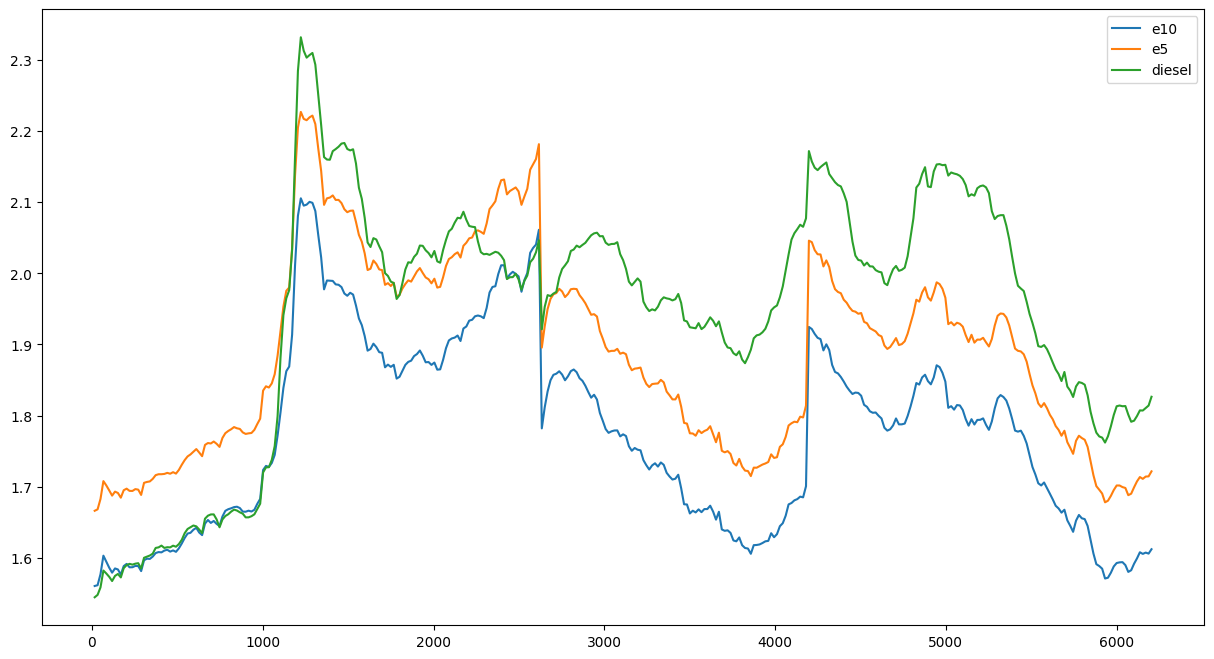

In [13]:
df.query('bundesland=="bundesweit"')[['e10', 'e5', 'diesel']].plot(figsize=(15,8))